In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
from ps3 import *

imageA=cv2.imread('input_images/img-3-a-1.png')
imageB=cv2.imread('input_images/ps3-3-c_base.jpg')
src_points=get_corners_list(imageA)
dst_points=find_markers(imageB)

height, width = 200, 500
src_points=[(0, 0), (0, height - 1), (width - 1, 0),(width - 1, height - 1)]
dst_points=np.array([(145, 54), (154, 150), (360, 70), (340, 130)])
homography=find_four_point_transform(src_points, dst_points)
print homography
for i in range(4):
    dst=np.dot(homography,np.array([src_points[i][0],src_points[i][1],1]))
    dst=dst/dst[2]
    #print dst
    #print dst_points[i]
ans=project_imageA_onto_imageB(imageA,imageB, homography)
plt.imshow(ans)
plt.show()

[[9.1870719e-01 2.2215156e-01 1.4500003e+02]
 [1.2692295e-01 6.5474206e-01 5.4000015e+01]
 [1.3551265e-03 1.1488672e-03 1.0000000e+00]]


<Figure size 640x480 with 1 Axes>

In [99]:
import numpy as np

height, width = 200, 500
src_points=[(0, 0), (0, height - 1), (width - 1, 0),(width - 1, height - 1)]
dst_points=np.array([(145, 54), (154, 150), (360, 70), (340, 130)])
homography=find_four_point_transform(src_points, dst_points)
inv_homo=np.linalg.inv(homography)

src_points=np.array(src_points)
third_col=np.ones((4,1)).astype(float)
dst=np.hstack((dst_points,third_col))
#print dst #[[x,y,1]]
factor=[[],[],[]]
for i in range(3):
    factor[i]=inv_homo[:,i]
#print factor[0] #[A11,A21,A31]
#print dst[:,0]  #[x1,x2,x3..]
ans=[[],[],[]]
#print np.transpose([factor[0]]).shape, np.array([dst[:,0]]).shape
for i in range(3):
    ans[i]=np.transpose([factor[i]])*np.array([dst[:,i]]) #3x1 * 1xn
    #ans[0] is [[A11*x1,A11*x2...],[A21*x1,A21*x2...],[A31*x1,A31*x2...]]
T=ans[0]+ans[1]+ans[2]
print np.transpose((T/T[2,:]).round())

[[  0.   0.   1.]
 [  0. 199.   1.]
 [499.   0.   1.]
 [499. 199.   1.]]


In [101]:
x = np.arange(0, 6, 1)
y = np.arange(0, 6, 1)
X,Y = np.meshgrid(x,y)
print X,"\n",Y
XY=np.array([X.flatten(),Y.flatten()]).T
print XY.shape
print XY[3,2]

[[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]] 
[[0 0 0 0 0 0]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [4 4 4 4 4 4]
 [5 5 5 5 5 5]]
(36L, 2L)


IndexError: index 2 is out of bounds for axis 1 with size 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


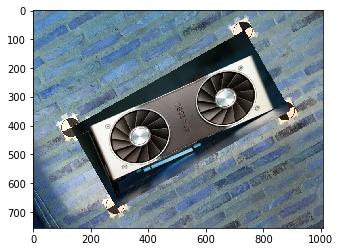

0.0650000572205


In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
from ps3 import *
import time

imageA=cv2.imread('input_images/img-3-a-1.png')
imageB=cv2.imread('input_images/ps3-3-c_base.jpg')
target_img=cv2.imread('input_images/ps3-3-c_base.jpg')
src_points=get_corners_list(imageA)
dst_points=find_markers(imageB, template=None)
homography=find_four_point_transform(src_points, dst_points)

inv_homo=np.linalg.inv(homography)
inv_homo=inv_homo.astype('float32')
map1=np.fromfunction(lambda j, i: (inv_homo[0,0]*i+inv_homo[0,1]*j+inv_homo[0,2])/(inv_homo[2,0]+inv_homo[2,1]+inv_homo[2,2]), (imageB.shape[0], imageB.shape[1]))
map2=np.fromfunction(lambda j, i: (inv_homo[1,0]*i+inv_homo[1,1]*j+inv_homo[1,2])/(inv_homo[2,0]+inv_homo[2,1]+inv_homo[2,2]), (imageB.shape[0], imageB.shape[1]))
map1=map1.astype('float32')
map2=map2.astype('float32')
imageB=cv2.remap(imageA, map1, map2, interpolation=cv2.INTER_LINEAR, dst=imageB, borderMode=cv2.BORDER_TRANSPARENT)


plt.imshow(imageB)
plt.show()
print end - start
#ans=project_imageA_onto_imageB(imageA, imageB, homography)
#plt.imshow(ans)
#plt.show()

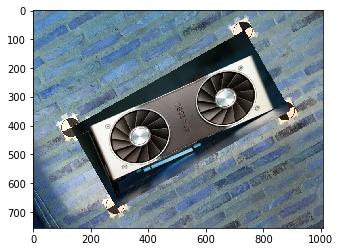

In [5]:
plt.imshow(imageB)
plt.show()